## Imports

In [2]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [3]:
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_91_glove_filtered_full.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

## Inspecting the Datasets

In [3]:
DATASET_FILEPATHS = ["./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"]

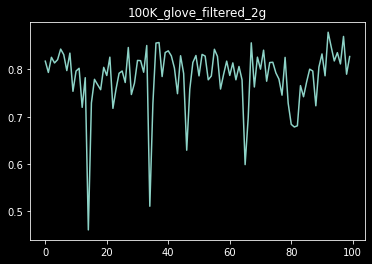

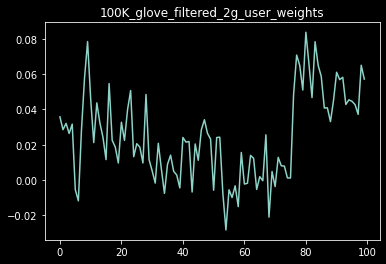

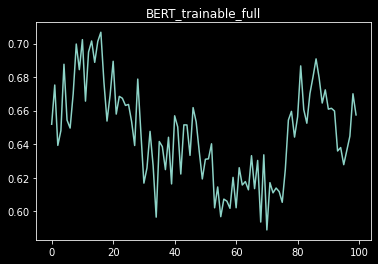

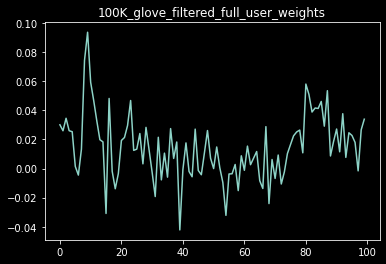

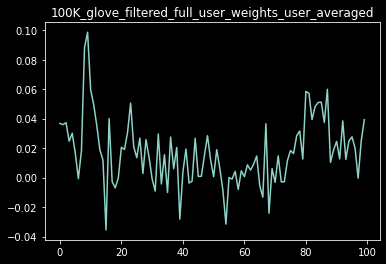

In [9]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    plt.title(filepath[38:-4])
    plt.plot(df['Bitcoin'][1200:1300].values)
    plt.show()

In [10]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    #BTC price data of the next hour standarized
    Y = pd.DataFrame(df['Open']).astype(float)
    #Y = dataset_standarization(Y)

    #Textual data ('Bitcoin' topic popularity) of the last hour standarized
    X = pd.DataFrame(df['Bitcoin_median']).astype(float)
    #X = dataset_standarization(X)
    Y.index = X.index

    X = sm.add_constant(X)

    model = sm.OLS(Y, X, missing = 'drop').fit()
    print(filepath[38:-4])
    print(model.summary())

100K_glove_filtered_2g
                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.716
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.190
Time:                        15:57:21   Log-Likelihood:                -13248.
No. Observations:                1428   AIC:                         2.650e+04
Df Residuals:                    1426   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5495.

## Import Sentiment values

In [10]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format1 = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format1) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.814122,0.891900,4128.005439
2017-09-13 02:00:00,0.812894,0.850564,4066.801167
2017-09-13 03:00:00,0.853220,0.846102,3999.225167
2017-09-13 04:00:00,0.838326,0.846102,3959.409667
2017-09-13 05:00:00,0.782210,0.815073,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.706585,0.819227,3584.926897
2019-01-22 19:00:00,0.889864,0.935381,3585.858545
2019-01-22 20:00:00,0.687378,0.781042,3585.295893
2019-01-22 21:00:00,0.767968,0.853416,3579.910755


In [13]:
# 2nd dataset used BERT (trainable) with open and close prices
DATASET_FILEPATH2 = "./Data Preprocessed/BERT_full2.csv"
df2 = pd.read_csv(DATASET_FILEPATH2, index_col = 0)
format = "%Y-%m-%d %H:%M:%S"
df2.index = [datetime.strptime(i, format) for i in df2.index]
df =df2
df

,Bitcoin,Bitcoin_median,Open,date,place,datetime,time
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13,0,2017-09-13 01:00:00,01:00:00
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13,1,2017-09-13 02:00:00,02:00:00
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13,2,2017-09-13 03:00:00,03:00:00
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13,3,2017-09-13 04:00:00,04:00:00
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13,4,2017-09-13 05:00:00,05:00:00
...,...,...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22,1408,2019-01-22 18:00:00,18:00:00
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22,1409,2019-01-22 19:00:00,19:00:00
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22,1410,2019-01-22 20:00:00,20:00:00
2019-01-22 21:00:00,0.654965,0.703751,3579.910755,2019-01-22,1411,2019-01-22 21:00:00,21:00:00


### Anlytics on Median vs mean

In [12]:
df['Open'] = df2['open']
df['Close'] = df2['close']

KeyError: 'open'

In [11]:
df['date'] = df.index.map(lambda x : str(x)[:-8])
df['place'] = range(0,1413)
df

,Bitcoin,Bitcoin_median,Open,date,place
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13,0
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13,1
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13,2
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13,3
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13,4
...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22,1408
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22,1409
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22,1410
2019-01-22 21:00:00,0.654965,0.703751,3579.910755,2019-01-22,1411


In [12]:
df.to_csv(DATASET_FILEPATH2)

In [13]:
k = pd.DataFrame(df.groupby(['date']).Bitcoin_median.apply(np.mean).values)
index = df.groupby(['date']).place.first()
l = pd.DataFrame(df.groupby(['date']).Bitcoin.apply(np.mean).values)

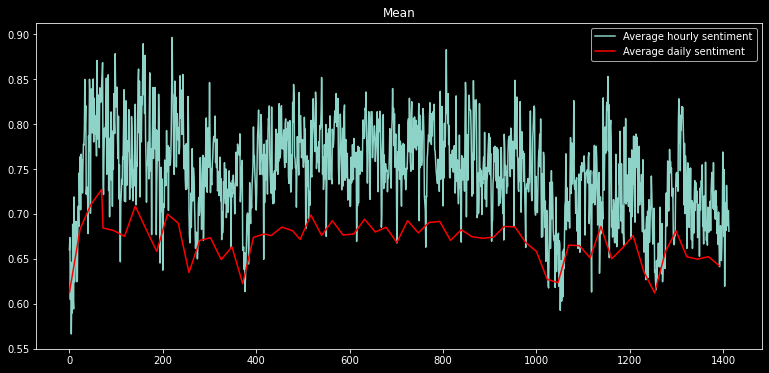

In [14]:
fig = plt.figure(figsize=(13, 6))
plt.title("Mean")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Average hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin.apply(np.mean),color = "red", label = 'Average daily sentiment')
plt.legend()
plt.show()

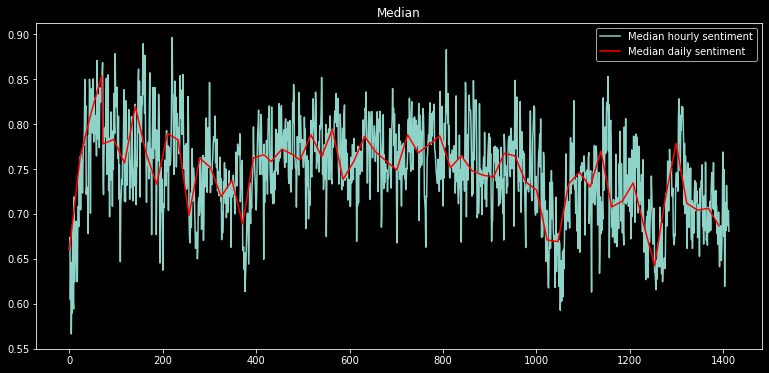

In [15]:
fig = plt.figure(figsize=(13, 6))
plt.title("Median")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Median hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin_median.apply(np.median),color = "red", label = 'Median daily sentiment')
plt.legend()
plt.show()

## Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [4]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
sys.path.append('./Data Preprocessed')
from custom_trading_engine import customNLP
from signals import *
from strategies import *
from data_import import BTC_total

In [5]:
# BTC_total()

In [6]:
# take btc prices
btc = pd.read_csv('./BTC_full2_1.csv', index_col = 0)
format = "%Y-%m-%d %H"
btc.index = [datetime.strptime(i, format) for i in btc.index]

#add date columsn to the btc price and sentiment datasets
btc['date'] = btc.index
df['date'] = df.index

# take the intersection of the two datasets to find the final dataset
df_final = pd.merge(df, btc, how = 'inner', on = ['date'])
df_final.index = df_final['date']
df_final

NameError: name 'df' is not defined

In [7]:
df_final.to_csv('./final_dataset.csv')

NameError: name 'df_final' is not defined

In [8]:
df_final = pd.read_csv('./final_dataset.csv', index_col = 0)
format = "%Y-%m-%d %H:%M:%S"
df_final.index = [datetime.strptime(i, format) for i in df_final.index]
df_final

,Bitcoin,Bitcoin_median,Open,date.1,place,datetime,time,open,close,volume
2017-09-13 01:00:00,0.614933,0.660034,4128.005439,2017-09-13 01:00:00,0,2017-09-13 01:00:00,01:00:00,4135.00,4110.97,1.210418e+06
2017-09-13 02:00:00,0.620224,0.673658,4066.801167,2017-09-13 02:00:00,1,2017-09-13 02:00:00,02:00:00,4101.49,4034.86,4.198789e+06
2017-09-13 03:00:00,0.582891,0.604611,3999.225167,2017-09-13 03:00:00,2,2017-09-13 03:00:00,03:00:00,4026.00,3945.01,7.790633e+06
2017-09-13 04:00:00,0.599718,0.646221,3959.409667,2017-09-13 04:00:00,3,2017-09-13 04:00:00,04:00:00,3945.01,4004.40,4.982865e+06
2017-09-13 05:00:00,0.562789,0.566217,3995.046667,2017-09-13 05:00:00,4,2017-09-13 05:00:00,05:00:00,4009.99,3984.97,3.957893e+06
...,...,...,...,...,...,...,...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897,2019-01-22 18:00:00,1408,2019-01-22 18:00:00,18:00:00,3591.44,3586.57,8.050906e+05
2019-01-22 19:00:00,0.642840,0.699695,3585.858545,2019-01-22 19:00:00,1409,2019-01-22 19:00:00,19:00:00,3586.74,3579.28,2.155876e+06
2019-01-22 20:00:00,0.658940,0.686578,3585.295893,2019-01-22 20:00:00,1410,2019-01-22 20:00:00,20:00:00,3581.87,3587.78,4.808546e+05
2019-01-22 21:00:00,0.654965,0.703751,3579.910755,2019-01-22 21:00:00,1411,2019-01-22 21:00:00,21:00:00,3587.78,3573.59,3.907966e+05


In [9]:
# import the spreads from Kraken historical data
df1 = pd.read_csv('./Data/bitcoinity_data.csv', index_col = False)
format2 = "%Y-%m-%d %H:%M:%S"
df1.index = df1['Time'].apply(lambda x: str(x)[:-4])
df1.index = [datetime.strptime(i, format2) for i in df1.index]
df1.columns = ['date','spreads']
# spreads are in % values
df1['spreads'] =0
df1

#algo.add_spreads(df1['spreads'])

,date,spreads
2014-02-15,2014-02-15 00:00:00 UTC,0
2014-02-16,2014-02-16 00:00:00 UTC,0
2014-02-17,2014-02-17 00:00:00 UTC,0
2014-02-18,2014-02-18 00:00:00 UTC,0
2014-02-19,2014-02-19 00:00:00 UTC,0
...,...,...
2021-06-19,2021-06-19 00:00:00 UTC,0
2021-06-20,2021-06-20 00:00:00 UTC,0
2021-06-21,2021-06-21 00:00:00 UTC,0
2021-06-22,2021-06-22 00:00:00 UTC,0


In [10]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
# signal = Signal_mean(df_final['Bitcoin'], pos = -1)
signal = Signal_standard(df_final['Bitcoin'], pos = 1)
strategy = BitcoinNLPStrategy(repos = 0)
strategy.add_signal(signal)
algo = customNLP(1, df_final[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

Opening LONG position of  1  USD at  4135.0  $
Closing LONG position of  1  USD at  3843.34  $
Opening LONG position of  0.9294374589378248  USD at  3844.87  $
Closing LONG position of  0.9294374589378248  USD at  3616.77  $
Opening LONG position of  0.8682144715219993  USD at  3922.43  $
Closing LONG position of  0.8682144715219993  USD at  3880.0  $
Opening LONG position of  0.8436798194776656  USD at  4340.0  $
Closing LONG position of  0.8436798194776656  USD at  4430.95  $
Opening LONG position of  0.8450775944496932  USD at  4837.05  $
Closing LONG position of  0.8450775944496932  USD at  4749.22  $
Opening LONG position of  0.8294494511799083  USD at  4837.04  $
Closing LONG position of  0.8294494511799083  USD at  5434.79  $
Opening LONG position of  0.9113324855838827  USD at  5406.87  $
Closing LONG position of  0.9113324855838827  USD at  5652.53  $
Opening LONG position of  0.9483014115553425  USD at  5697.57  $
Closing LONG position of  0.9483014115553425  USD at  5754.3  

In [290]:
# signal = Signal3(df2['Bitcoin_'])
# strategy = BitcoinNLPStrategy()
# strategy.add_signal(signal)
# algo = customNLP(1, df2[['Open','Close']], strategy)
# #algo.set_stoploss(0.01)
# algo.add_spreads(df1['spreads'])
# algo.run(split = True)

In [114]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

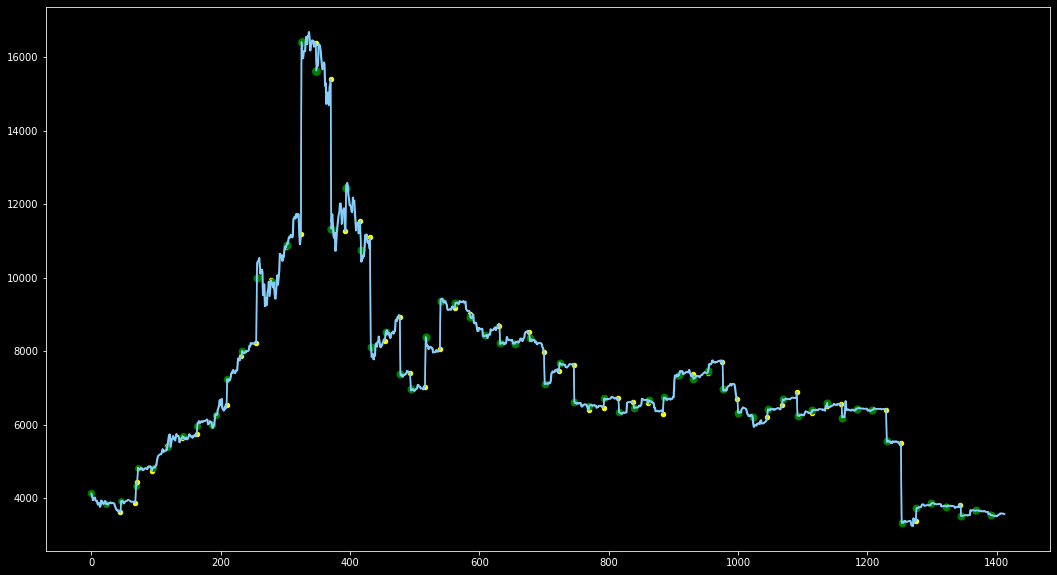

In [11]:
#plot trading history
algo.plot()

In [12]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [13]:
#a better plotting of trading history
btc['Open'] = btc['open']
algo.plot2(btc)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:309: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  long = df[df['sign'] == 1][df['change'] != 0]
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:310: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  short = df[df['sign'] == -1][df['change'] != 0]
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:311: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  close = df[df['sign'] == 0][df['change'] != 0]


In [267]:
print(algo.metrics.dropna().info(verbose= True))
algo.metrics.dropna().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1427 entries, 2017-09-13 02:00:00 to 2019-01-22 22:00:00
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position USD      1427 non-null   object
 1   Position BTC      1427 non-null   object
 2   Price USD         1427 non-null   object
 3   Cash USD          1427 non-null   object
 4   Portfolio Marked  1427 non-null   object
dtypes: object(5)
memory usage: 66.9+ KB
None


,Position USD,Position BTC,Price USD,Cash USD,Portfolio Marked
2017-09-13 02:00:00,1.0,0.000244,4103.394725,0.0,0.983298
2017-09-13 03:00:00,-1.387043,-0.000349,4024.130333,2.387043,1.008334
2017-09-13 04:00:00,-0.515935,-0.000129,3946.842056,1.515935,1.000282
2017-09-13 05:00:00,1.560824,0.000389,4011.852232,-0.560824,0.988869
2017-09-13 06:00:00,-0.895114,-0.000228,3981.150302,1.895114,0.975853


In [112]:
algo.metrics['Position USD'].min()

-6.154405445819518

In [9]:
p = figure(x_axis_type="datetime", title="Daily Spread (Kraken)", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Spread %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
df1['year'] = df1['date'].apply(lambda x : int(x[:4]))
df_spreads = df1[df1['year']>2016][df1['year']<2020]
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(df_spreads.index.values, df_spreads['spreads'].values*100, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

<ipython-input-9-21d5d29ff736>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spreads = df1[df1['year']>2016][df1['year']<2020]


In [14]:
p = figure(x_axis_type="datetime", title="Portfolio Value", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [15]:
# Portfolio value per trade

p = figure(title="Portfolio Value", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

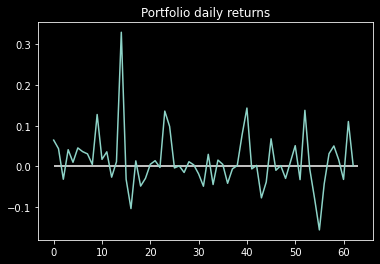

In [72]:
algo.metrics['date'] =  algo.metrics.index.map(lambda x : str(x)[:-9])
algo.metrics['hour'] =  algo.metrics.index.map(lambda x : str(x)[-8:])

plt.title("Portfolio daily returns")
daily_returns = algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna()
plt.hlines(0 ,0 ,daily_returns.shape[0])
plt.plot(daily_returns.values)

In [299]:
algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna().index

Index(['2017-09-21', '2017-09-26', '2017-10-07', '2017-10-10', '2017-10-12',
       '2017-10-13', '2017-10-16', '2017-10-21', '2017-11-13', '2017-11-16',
       '2017-11-20', '2017-11-30', '2017-12-01', '2017-12-03', '2017-12-14',
       '2017-12-27', '2018-01-18', '2018-01-21', '2018-01-26', '2018-03-15',
       '2018-03-20', '2018-04-03', '2018-04-08', '2018-04-16', '2018-05-08',
       '2018-05-10', '2018-05-11', '2018-05-13', '2018-05-19', '2018-05-20',
       '2018-05-22', '2018-05-29', '2018-06-08', '2018-06-15', '2018-06-17',
       '2018-06-19', '2018-07-02', '2018-07-04', '2018-07-10', '2018-07-17',
       '2018-07-18', '2018-07-21', '2018-07-23', '2018-08-07', '2018-08-13',
       '2018-08-14', '2018-08-23', '2018-08-27', '2018-09-18', '2018-09-20',
       '2018-09-29', '2018-10-15', '2018-10-18', '2018-10-24', '2018-11-16',
       '2018-12-04', '2018-12-07', '2018-12-30', '2019-01-03', '2019-01-04',
       '2019-01-14', '2019-01-15', '2019-01-22'],
      dtype='object', name

In [18]:
p = figure(x_axis_type="datetime", title="Daily Returns", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Return %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'

daily_returns.index = pd.to_datetime(daily_returns.index)
daily_returns.index

# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.vbar(daily_returns.index.values, width=1, top = daily_returns.values, color='steelblue')

# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [50]:
import ffn

In [55]:
ffn.calc_sharpe(daily_returns, nperiods = 252, annualize = True)

2.8440127579794523

In [56]:
len(daily_returns)

63

In [59]:
sr = (np.mean(daily_returns)*252)/(np.std(daily_returns)*math.sqrt(252))
sr

2.8668566009223944

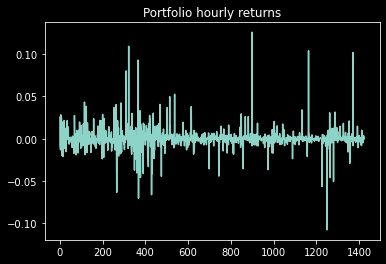

In [20]:
plt.title("Portfolio hourly returns")
returns = algo.metrics['Portfolio Marked'].pct_change().dropna()

plt.plot(returns.values)
plt.savefig('hourly_returns.png')

In [21]:
p = figure(x_axis_type="datetime", title="Hourly Returns", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Return %'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'

returns.index = pd.to_datetime(returns.index)
returns.index

# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.vbar(returns.index.values, width=1, top = returns.values, color='steelblue')

# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [304]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

3.870728618377504

In [305]:
#algo.metrics = algo.metrics.fillna(0)
print(algo.metrics.info(verbose = True))
algo.metrics.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1428 entries, 2017-09-13 01:00:00 to 2019-01-22 22:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position USD      1427 non-null   object
 1   Position BTC      1427 non-null   object
 2   Price USD         1427 non-null   object
 3   Cash USD          1427 non-null   object
 4   Portfolio Marked  1427 non-null   object
 5   date              1428 non-null   object
 6   hour              1428 non-null   object
dtypes: object(7)
memory usage: 121.5+ KB
None


,Position USD,Position BTC,Price USD,Cash USD,Portfolio Marked,date,hour
2017-09-13 01:00:00,NaN,NaN,NaN,NaN,NaN,2017-09-13,01:00:00
2017-09-13 02:00:00,0.001227,0.0,4103.394725,0.998773,0.99998,2017-09-13,02:00:00
2017-09-13 03:00:00,-64.711289,-0.016081,4024.130333,65.711289,2.272296,2017-09-13,03:00:00
2017-09-13 04:00:00,-1.405249,-0.000041,3946.842056,2.405249,2.240467,2017-09-13,04:00:00
2017-09-13 05:00:00,6.259284,0.001869,4011.852232,-5.259284,2.189908,2017-09-13,05:00:00


In [70]:
algo.metrics

,Position USD,Position BTC,Price USD,Cash USD,Portfolio Marked
2017-09-13 01:00:00,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,1.0,0.000244,4101.49,0.0,0.983755
2017-09-13 03:00:00,-1.387687,-0.000349,4026.0,2.387687,1.00988
2017-09-13 04:00:00,-0.516726,-0.000128,3945.01,1.516726,1.00225
2017-09-13 05:00:00,1.563899,0.00039,4009.99,-0.563899,0.991765
...,...,...,...,...,...
2019-01-22 18:00:00,1.29195,0.000658,3591.44,-0.29195,2.0667
2019-01-22 19:00:00,-4.555059,-0.000973,3586.74,5.555059,2.074067
2019-01-22 20:00:00,1.917049,0.000834,3581.87,-0.917049,2.076479
2019-01-22 21:00:00,-0.69054,0.000108,3587.78,1.69054,2.074952


In [77]:
algo.metrics['day'] = algo.metrics.date.apply(lambda x : pd.to_datetime(x).weekday())

day
0    0.029207
1   -0.217213
2    0.001270
3   -0.268075
4    0.130366
5   -0.253534
6   -0.160450
Name: Position USD, dtype: float64

In [102]:
days = list(set(algo.metrics.day.values))
hours = list(set(algo.metrics.hour.values))
heatm = pd.DataFrame(columns=sorted(hours), index = sorted(days))
heatm2 = pd.DataFrame(columns=sorted(hours), index = sorted(days))
for idx, row in algo.metrics.iterrows():
    d = row['day']
    h = row['hour']
    heatm.loc[d][h] = row['Position USD']
    if row['Position USD'] !=0:
        heatm2.loc[d][h] = row['Position USD']/abs(row['Position USD'])
    else:
        heatm2.loc[d][h] = 0
heatm = heatm.fillna(0)
heatm2 = heatm2.fillna(0)
heatm.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatm2.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatm2

,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Mon,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,0
Tue,0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,0
Wed,0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
Thu,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
Fri,0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0
Sat,0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
Sun,0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,0


In [27]:
dates = list(set(algo.metrics.date.values))
hours = list(set(algo.metrics.hour.values))
heatm = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
heatm2 = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
for d in sorted(dates):
    for h in sorted(hours):
        this_datetime = d + " " + h
        if this_datetime in algo.metrics.index and algo.metrics.loc[this_datetime]['Position USD'] != 0:
            heatm2.loc[d][h] = algo.metrics.loc[this_datetime]['Position USD']/abs(algo.metrics.loc[this_datetime]['Position USD'])
            heatm.loc[d][h] = algo.metrics.loc[this_datetime]['Position USD']
        else:
            heatm.loc[d][h] = 0
heatm = heatm.fillna(0)
heatm2 = heatm2.fillna(0)
heatm2

,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2017-09-13,0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,0
2017-09-21,0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0
2017-09-26,0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0
2017-10-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2017-10-10,0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-03,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2019-01-04,0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0
2019-01-14,0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,0
2019-01-15,0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0


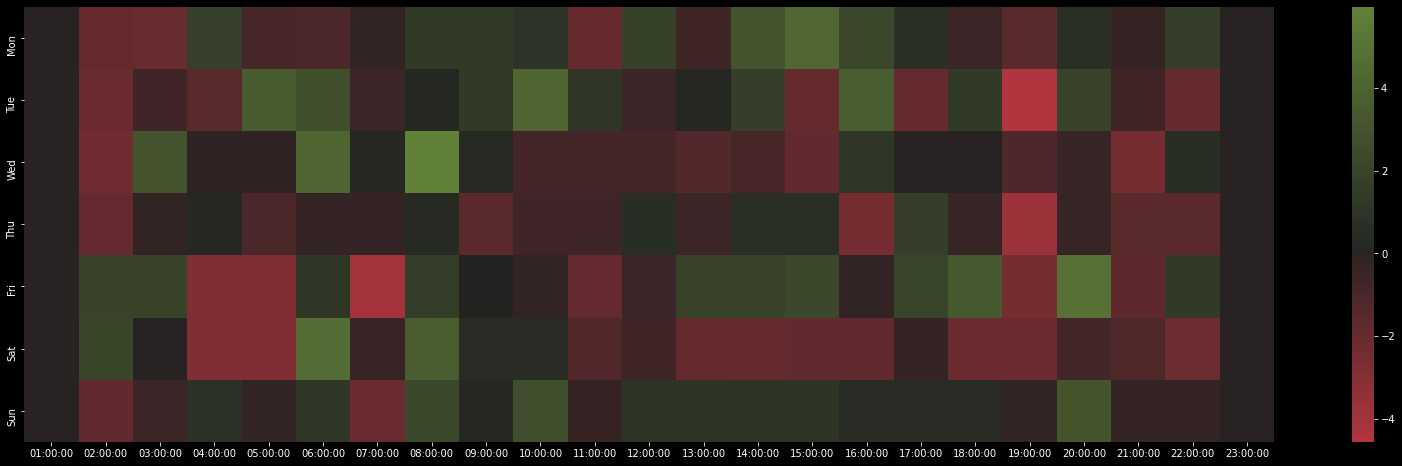

In [109]:
import seaborn as sns
import pandas as pd
import numpy as np

cmap = sns.diverging_palette(10, 110, s=75, l=50, n=9,center = 'dark', as_cmap=True)

fig = plt.figure(figsize=(28, 8))
# Default heatmap
p1 = sns.heatmap(heatm, cmap = cmap, center = 0)
plt.savefig('heatmapX.png')

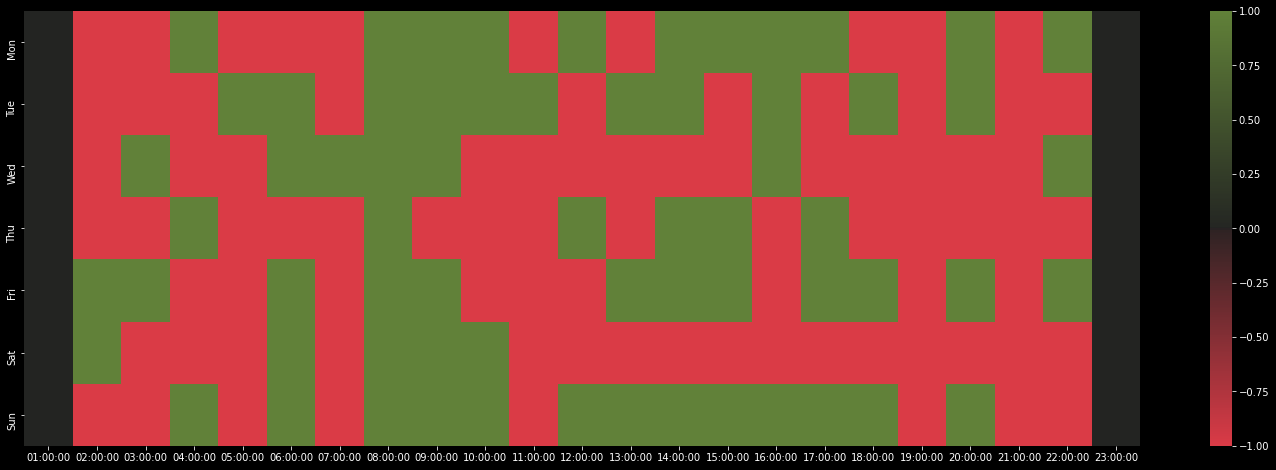

In [106]:
fig = plt.figure(figsize=(25, 8))
# Default heatmap
p1 = sns.heatmap(heatm2, cmap = cmap, center = 0)
plt.savefig('heatmap2X.png')

## Compare Periods

In [30]:
df_final['year'] =  df_final.index.map(lambda x : str(x)[:4])
df_17 = df_final[df_final['year']=='2017']
df_18 = df_final[df_final['year']=='2018']
df_19 = df_final[df_final['year']=='2019']
print(df_17, df_18, df_19)

                      Bitcoin  Bitcoin_median          Open  \
date                                                          
2017-09-13 01:00:00  0.814122        0.891900   4128.005439   
2017-09-13 02:00:00  0.812894        0.850564   4066.801167   
2017-09-13 03:00:00  0.853220        0.846102   3999.225167   
2017-09-13 04:00:00  0.838326        0.846102   3959.409667   
2017-09-13 05:00:00  0.782210        0.815073   3995.046667   
...                       ...             ...           ...   
2017-12-27 19:00:00  0.789274        0.819227  15033.023333   
2017-12-27 20:00:00  0.825048        0.846539  14766.958167   
2017-12-27 21:00:00  0.710272        0.747295  15041.734000   
2017-12-27 22:00:00  0.781089        0.855101  15281.260667   
2017-12-27 23:00:00  0.763905        0.790627  15342.861864   

                                   date      open     close        volume  \
date                                                                        
2017-09-13 01:00:00 2017-0

### 2017

In [31]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_17['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_17[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return self.pos * (self.data[datetime] - mean) / stdv


Opening LONG position of  1.0  USD at  4103.394724548955  $
Opening SHORT position of  2.3870431414589914  USD at  4024.1303328707136  $
Opening LONG position of  0.8711083018920334  USD at  3946.84205551955  $
Opening LONG position of  2.0767586410896177  USD at  4011.852232114199  $
Opening SHORT position of  2.455937826352443  USD at  3981.1503019930583  $
Opening SHORT position of  0.26625022836870693  USD at  4021.131726065296  $
Opening LONG position of  2.131826605930555  USD at  3937.687806276074  $
Opening SHORT position of  1.247531799425229  USD at  3927.57519373626  $
Opening SHORT position of  0.8988037399700821  USD at  3936.7409352048207  $
Opening LONG position of  1.9930606222986351  USD at  3856.7102178862465  $
Opening SHORT position of  0.8615076644218927  USD at  3820.2250701023017  $
Opening LONG position of  1.8530290525336501  USD at  3879.9410012123126  $
Opening SHORT position of  2.3378878618141785  USD at  3835.008201653012  $
Opening LONG position of  1.730

Opening LONG position of  1.459900426068511  USD at  6076.314716441845  $
Opening SHORT position of  1.1794781858780568  USD at  6074.943866767563  $
Closing SHORT position of  -0.41683604324611767  USD at  6012.86  $
Opening SHORT position of  1.1525897036243704  USD at  5907.752547215837  $
Opening LONG position of  0.6126394928213811  USD at  5953.569043867638  $
Opening LONG position of  2.20450027078354  USD at  5987.957926451329  $
Opening SHORT position of  1.2168027216677255  USD at  6066.775133544294  $
Opening SHORT position of  0.9466141975880603  USD at  6261.458117586279  $
Opening SHORT position of  0.6946215599045106  USD at  6290.552124801548  $
Opening LONG position of  0.7602110376403174  USD at  6269.87272298262  $
Opening LONG position of  1.4397402263565846  USD at  6275.385750129438  $
Opening SHORT position of  1.3566863666277285  USD at  6521.415220873513  $
Opening LONG position of  0.9025346635462608  USD at  6683.669934799224  $
Opening LONG position of  1.05

Opening SHORT position of  1.391661282450253  USD at  15206.336095072049  $
Opening LONG position of  1.300204538633642  USD at  14952.538030192494  $
Opening SHORT position of  2.252220173625134  USD at  14871.505288234071  $
Opening LONG position of  4.732198894914742  USD at  14711.416312126681  $
Opening SHORT position of  2.870544443595727  USD at  15092.653539938463  $
Opening LONG position of  0.7232759065024534  USD at  15280.603637469589  $
Closing LONG position of  1.3267875782532335  USD at  Open     15272.89
Close    15399.99
Name: 2017-12-27 23:00:00, dtype: float64  $


In [32]:
p = figure(x_axis_type="datetime", title="Portfolio Value 2017", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [33]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2017", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

### 2018

In [34]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_18['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_18[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

Opening SHORT position of  1.0  USD at  11541.598311034384  $
Opening LONG position of  1.0616549091561789  USD at  11735.374567572913  $
Opening SHORT position of  1.3951929228996132  USD at  11448.441434490069  $
Opening LONG position of  3.000408240101051  USD at  11142.937110238809  $
Opening SHORT position of  1.574158056205508  USD at  11096.172318777439  $
Opening SHORT position of  1.1059774262523105  USD at  11223.259846096127  $
Opening LONG position of  2.0028847367788587  USD at  11226.394648351015  $
Opening SHORT position of  1.1926294300534126  USD at  11396.78089432726  $
Opening LONG position of  1.3092920591251538  USD at  11591.572656800985  $
Opening SHORT position of  2.0750422645488165  USD at  11756.295878025581  $
Opening LONG position of  1.402258004115894  USD at  11899.638133474855  $
Opening LONG position of  1.0543072946842837  USD at  11581.596974568896  $
Opening SHORT position of  1.0755864229444285  USD at  11292.270492221916  $
Closing LONG position of

Opening SHORT position of  0.37056910454325886  USD at  7968.809248698178  $
Opening LONG position of  0.710311106227747  USD at  7977.681913205253  $
Opening LONG position of  1.6463139679453926  USD at  7969.730236774714  $
Opening SHORT position of  0.8384453704563931  USD at  7972.168540169045  $
Opening LONG position of  1.4404931349828543  USD at  8030.643078865261  $
Opening SHORT position of  1.5657777630635261  USD at  7989.2349405879995  $
Opening SHORT position of  0.7552835755354594  USD at  8014.889529618485  $
Opening LONG position of  1.6900118479578674  USD at  8041.07527825778  $
Closing LONG position of  1.2991847947043949  USD at  8053.36  $
Opening SHORT position of  1.2503193863392954  USD at  9405.75231276313  $
Opening LONG position of  1.7460317914923744  USD at  9430.30123567287  $
Opening LONG position of  0.9178566536838852  USD at  9325.153827969796  $
Opening SHORT position of  1.6816999785436642  USD at  9321.256306152143  $
Opening LONG position of  1.586

Opening SHORT position of  0.9205454857235984  USD at  8558.312592784552  $
Opening SHORT position of  0.4724134926194281  USD at  8487.986376541721  $
Closing SHORT position of  -0.14736972640772494  USD at  8523.86  $
Opening SHORT position of  1.2266078741125153  USD at  8274.17060350419  $
Opening LONG position of  2.6437949168791466  USD at  8288.181292103573  $
Opening SHORT position of  2.46558771635038  USD at  8324.682060586789  $
Opening LONG position of  0.6423042398736544  USD at  8274.99906336938  $
Opening LONG position of  1.0581727486852033  USD at  8268.237920255333  $
Opening SHORT position of  1.238638991910699  USD at  8189.514921176725  $
Opening LONG position of  1.7378116484774484  USD at  8221.269979332901  $
Opening SHORT position of  0.9415862241595934  USD at  8224.608985776867  $
Opening SHORT position of  1.3615081099872253  USD at  8227.568485241722  $
Opening LONG position of  0.6826500795858101  USD at  8215.238959661645  $
Opening SHORT position of  1.0

Opening SHORT position of  1.0954401330931456  USD at  6615.994593176538  $
Opening LONG position of  1.8258936847859895  USD at  6610.484335466019  $
Opening SHORT position of  1.1772163542120881  USD at  6609.045596671716  $
Opening SHORT position of  0.26070473116720305  USD at  6629.432652604567  $
Opening LONG position of  0.47128068144665136  USD at  6616.045138262162  $
Opening SHORT position of  0.46165916047164457  USD at  6622.343676314036  $
Closing SHORT position of  -1.125114232047818  USD at  6612.98  $
Opening LONG position of  1.1666181268029563  USD at  6458.856456846818  $
Opening SHORT position of  2.2287532658645945  USD at  6472.261353948362  $
Opening LONG position of  1.789153843964681  USD at  6469.6480047839095  $
Opening SHORT position of  0.7909623255176832  USD at  6469.581738422079  $
Opening SHORT position of  1.3713934256490925  USD at  6469.071811586854  $
Opening LONG position of  1.8380632943831123  USD at  6467.767735078466  $
Opening LONG position of

Closing LONG position of  0.22833984641144034  USD at  6197.9  $
Opening SHORT position of  1.317087365855555  USD at  6412.965551401853  $
Opening LONG position of  3.403522749510377  USD at  6396.352225051  $
Opening SHORT position of  1.4881886699018043  USD at  6428.173691107458  $
Opening LONG position of  0.4148193940190539  USD at  6433.566776106519  $
Opening LONG position of  2.1563902124866408  USD at  6441.9077961496  $
Opening SHORT position of  0.7746792903599844  USD at  6432.393174970552  $
Opening SHORT position of  2.538197231734014  USD at  6407.816181284571  $
Opening SHORT position of  1.0255328765147234  USD at  6398.617306511949  $
Opening LONG position of  0.8492284101794645  USD at  6431.186485015089  $
Opening LONG position of  0.36832306133922077  USD at  6440.247593119442  $
Opening SHORT position of  0.8653695665986345  USD at  6454.9704132711795  $
Opening SHORT position of  0.37906872101059164  USD at  6450.450966100283  $
Opening LONG position of  1.66416

Opening SHORT position of  1.1446183680142026  USD at  4028.098067077509  $
Opening LONG position of  1.3630068153533927  USD at  3974.8896206090785  $
Opening SHORT position of  1.2442828508136219  USD at  3933.4392621653974  $
Opening LONG position of  1.7251580128995065  USD at  3913.2258196250446  $
Opening SHORT position of  1.4372962951935058  USD at  3909.3046661516837  $
Opening LONG position of  1.4486274690300966  USD at  3907.2344787021843  $
Opening LONG position of  3.00961827932276  USD at  3863.9847989852396  $
Opening SHORT position of  2.3457702274867396  USD at  3890.558863531256  $
Opening SHORT position of  3.3180425682669106  USD at  3898.5770681721  $
Closing SHORT position of  -1.6136716227005183  USD at  3902.06  $
Opening SHORT position of  1.2618075489412794  USD at  3356.0851693433847  $
Opening LONG position of  1.0622543095767756  USD at  3340.740488945803  $
Opening SHORT position of  1.2247827448240236  USD at  3328.7721262665164  $
Opening LONG position 

In [35]:
# Portfolio value per date

p = figure(x_axis_type="datetime", title="Portfolio Value 2018", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [36]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2018", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

### 2019

In [37]:
# signal = Signal_mean_window(df_final['Bitcoin'], pos = -1, window_size = 15)
signal = Signal_mean(df_19['Bitcoin'], pos = -1)
# signal = Signal_standard(df_final['Bitcoin'], pos = -1)
strategy = BitcoinNLPStrategy(repos = 1)
strategy.add_signal(signal)
algo = customNLP(1, df_19[['open','close']], strategy, leverage = True)
#algo.set_stoploss(0.01)
algo.add_spreads(df1['spreads'])
algo.run(split = True)

Opening SHORT position of  1.0  USD at  3862.794581727327  $
Opening LONG position of  0.8862208901710428  USD at  3865.1955683454644  $
Opening LONG position of  0.18598027100897935  USD at  3875.017767919816  $
Opening SHORT position of  0.6067026016821078  USD at  3863.2044898917384  $
Opening LONG position of  0.6825027653044345  USD at  3849.6320830728673  $
Opening SHORT position of  0.9449783777562453  USD at  3830.8317426633766  $
Opening LONG position of  1.0661227389521917  USD at  3834.308651557688  $
Opening SHORT position of  0.5491564078317439  USD at  3851.1371934418826  $
Opening LONG position of  0.5965857562911634  USD at  3847.981713490619  $
Opening SHORT position of  1.6213444152628473  USD at  3840.659540849133  $
Opening LONG position of  2.181143904067187  USD at  3773.184963575143  $
Opening SHORT position of  1.0696562980545636  USD at  3779.153320667268  $
Opening SHORT position of  1.818909420555084  USD at  3781.3328323707215  $
Opening LONG position of  1.

In [38]:
p = figure(x_axis_type="datetime", title="Portfolio Value 2019", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(algo.metrics.index.values, algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

In [39]:
# Portfolio value per trade

p = figure(title="Portfolio Value 2019", plot_width=800, plot_height=600)
# p2.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Trade'
p.yaxis.axis_label = 'Value'
# p2.ygrid.band_fill_color = "lightsteelblue"
# p2.ygrid.band_fill_alpha = 0.1

curdoc().theme = 'dark_minimal'
# p2.line(self.data.index.values, self.data['Open'].values, legend_label='avg', color='navy')
p.line(range(0,algo.metrics.shape[0]), algo.metrics['Portfolio Marked'].values, color='steelblue', alpha=1, line_width=2)
# output_file("stocks.html", title="stocks.py example")

bokeh.plotting.show(p)

## Generate Random Strategies

In [91]:
# #best strategy play the opposite (with stoploss)
# cash = []
# for stop in range(1, 50):
#     signal = Signal2(df['Bitcoin'])
#     strategy = BitcoinNLPStrategy2()
#     strategy.add_signal(signal)
#     algo = customNLP(100000, df['Open'], strategy)
#     algo.set_stoploss(stop/1000)
    
#     algo.run(split = True, verbose = False)
#     cash.append(algo.cash)
# #plt.plot(list(algo.metrics['Portfolio Marked']))

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

## Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)